In [2]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 12.1 MB/s eta 0:00:00


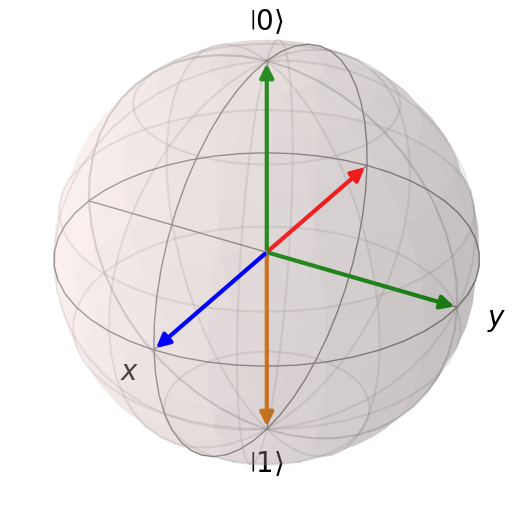

In [ ]:
import numpy as np
from qutip import Bloch, basis, expect, sigmax, sigmay, sigmaz

# Create the Bloch sphere
b = Bloch()

# List of quantum states
states = [
    basis(2, 0),  # |0⟩
    basis(2, 1),  # |1⟩
    (basis(2, 0) + basis(2, 1)).unit(),        # |+⟩
    (basis(2, 0) - basis(2, 1)).unit(),        # |−⟩
    (basis(2, 0) + 1j * basis(2, 1)).unit()    # |+i⟩
]

# Convert every state to coordinates (x,y,z)
for state in states:
    x = expect(sigmax(), state)
    y = expect(sigmay(), state)
    z = expect(sigmaz(), state)
    b.add_vectors([x, y, z])

# Show the sphere
b.show()

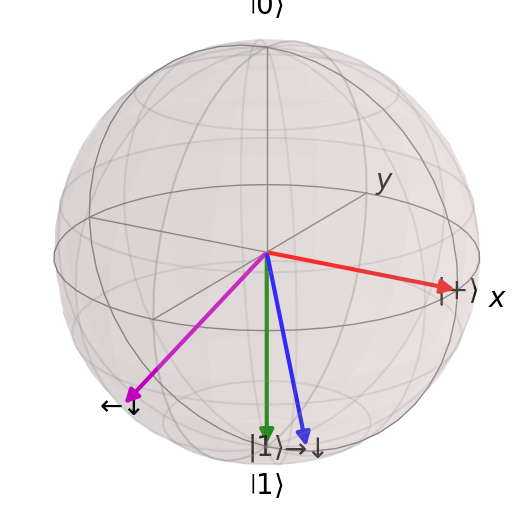

In [15]:
import numpy as np
from qutip import Bloch, basis, sigmax, sigmay, sigmaz

#Function to construct an state with angles theta and phi
def bloch_state(theta_deg, phi_deg):
    theta = np.deg2rad(theta_deg)
    phi = np.deg2rad(phi_deg)
    return (np.cos(theta / 2) * basis(2, 0) +
            np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()

# We define the four states
state_plus = (basis(2, 0) + basis(2, 1)).unit()       # |+⟩
state_1 = basis(2, 1)                                 # |1⟩
state_3 = bloch_state(135, -45)
state_4 = bloch_state(135, -135)

states = [state_plus, state_1, state_3, state_4]
labels = ['|+⟩', '|1⟩', '→↓', '←↓']

# Create the bloch sphere
b = Bloch()
b.vector_color = ['r', 'g', 'b', 'm']

# Add vectors and labels
for state, label in zip(states, labels):
    x = np.real(state.dag() * sigmax() * state)
    y = np.real(state.dag() * sigmay() * state)
    z = np.real(state.dag() * sigmaz() * state)
    b.add_vectors([x, y, z])
    b.add_annotation([x, y, z], label)

#Rotate the view of the blochs sphere
b.view = [-150, 20]
# Show the sphere
b.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Function to convert coordenades to vectors of the bloch sphere
def bloch_coords(state):
    from qutip import sigmax, sigmay, sigmaz
    x = np.real(state.dag() * sigmax() * state)
    y = np.real(state.dag() * sigmay() * state)
    z = np.real(state.dag() * sigmaz() * state)
    return float(x), float(y), float(z)

# Quantum states
from qutip import basis
def bloch_state(theta_deg, phi_deg):
    theta = np.deg2rad(theta_deg)
    phi = np.deg2rad(phi_deg)
    return (np.cos(theta / 2) * basis(2, 0) +
            np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()

states = [
    (basis(2, 0), "|0>", 'black'),
    ((basis(2, 0) + basis(2, 1)).unit(), "a", 'red'),
    (basis(2, 1), "a'", 'green'),
    (bloch_state(135, -45), "b", 'magenta'),
    (bloch_state(135, -135), "b'", 'blue')
]

# Coordenates of the vectors
vectors = [(*bloch_coords(s), label, color) for s, label, color in states]

# Create the sphere
u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)

fig = go.Figure(data=[
    go.Surface(x=x, y=y, z=z, colorscale='RdBu', opacity=0.1, showscale=False)
])

# Add vectors
for x_v, y_v, z_v, label, color in vectors:
    fig.add_trace(go.Scatter3d(
        x=[0, x_v],
        y=[0, y_v],
        z=[0, z_v],
        mode='lines+text',
        line=dict(color=color, width=6),
        text=[None, label],
        textposition="top center"
    ))

# Configure the view
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-1.1, 1.1], visible=False),
        yaxis=dict(range=[-1.1, 1.1], visible=False),
        zaxis=dict(range=[-1.1, 1.1], visible=False),
        aspectmode='cube'
    ),
    margin=dict(l=0, r=0, t=0, b=0),
)

fig.show()